In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('fivethirtyeight')

In [ ]:
train = pd.read_csv("drugsComTrain_raw.csv")

In [ ]:
#test = pd.read_csv("drugsComTest_raw.csv")

In [ ]:
#test.head()

NameError: ignored

In [ ]:
final=train.copy()

In [ ]:
train.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17


In [ ]:
train.shape

(161297, 7)

In [ ]:
final = final[final["condition"].str.contains("</span> users found this comment helpful.") == False]

In [ ]:
train = train[train["condition"].str.contains("</span> users found this comment helpful.") == False]

In [ ]:
final.shape

(159498, 7)

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159498 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     159498 non-null  int64 
 1   drugName     159498 non-null  object
 2   condition    159498 non-null  object
 3   review       159498 non-null  object
 4   rating       159498 non-null  int64 
 5   date         159498 non-null  object
 6   usefulCount  159498 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.7+ MB


In [ ]:
train.drugName.unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Mavik', 'Aldomet',
       'Grifulvin V'], dtype=object)

In [ ]:
train.drugName.nunique()

3412

In [ ]:
train.condition.unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

In [ ]:
train.condition.nunique()

811

In [ ]:
train.describe()

,uniqueID,rating,usefulCount
count,159498.000000,159498.000000,159498.000000
mean,115950.440325,6.997147,28.192335
std,66998.007821,3.272517,36.512639
min,2.000000,1.000000,0.000000
25%,58082.500000,5.000000,6.000000
50%,115819.500000,8.000000,16.000000
75%,173807.250000,10.000000,37.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
train[train['usefulCount'] == 0]

,uniqueID,drugName,condition,review,rating,date,usefulCount
16,48188,Trimethoprim,Urinary Tract Infection,"""This drug worked very well for me and cleared...",9,22-Sep-17,0
38,60678,MoviPrep,Bowel Preparation,"""I have taken this at least 5-6 times for the ...",2,29-Jun-17,0
45,111409,Ledipasvir / sofosbuvir,Hepatitis C,"""At initial testing my VL was over 6 million. ...",10,22-Sep-15,0
97,60280,NuvaRing,Birth Control,"""I am torn by the Nuvaring. The convenience is...",5,31-Oct-11,0
101,229524,Lurasidone,Schizophrenia,"""I&#039;ve been on Latuda for a little under 2...",8,26-Sep-15,0
...,...,...,...,...,...,...,...
161252,230002,Myobloc,Cervical Dystonia,"""I was given this for spasms in upper spine an...",1,22-Nov-17,0
161257,142183,Levonorgestrel,Birth Control,"""There are some bad reviews about Kyleena - so...",10,6-Dec-17,0
161273,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0
161276,176146,Lorazepam,Anxiety,"""About 4 years ago I started having early-morn...",8,21-Nov-17,0


In [ ]:
train[train['usefulCount'] == 0].count()[0]

6113

In [ ]:
train[(train['usefulCount'] == 0) & train['rating'] >= 8].count()[0]

0

In [ ]:
train[train['usefulCount'] > 1000]

,uniqueID,drugName,condition,review,rating,date,usefulCount
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291


In [ ]:
train[train['usefulCount'] > 1000].count()[0]

4

In [ ]:
train[train['usefulCount'] > 1000]['rating'].mean()

10.0

In [ ]:
train[train['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True)

,drugName,condition
0,Mirena,Birth Control
1,Sertraline,Depression
2,Levonorgestrel,Birth Control
3,Zoloft,Depression


In [ ]:
train[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,159498,159498,159498
unique,3412,811,111210
top,Levonorgestrel,Birth Control,"""Good"""
freq,3631,28788,33


In [ ]:
train.condition.isnull().sum()

0

In [ ]:
train = train.dropna()

In [ ]:
final=final.dropna()

In [ ]:
final.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

Text(0.5, 1.0, 'Rating vs Useful Count')

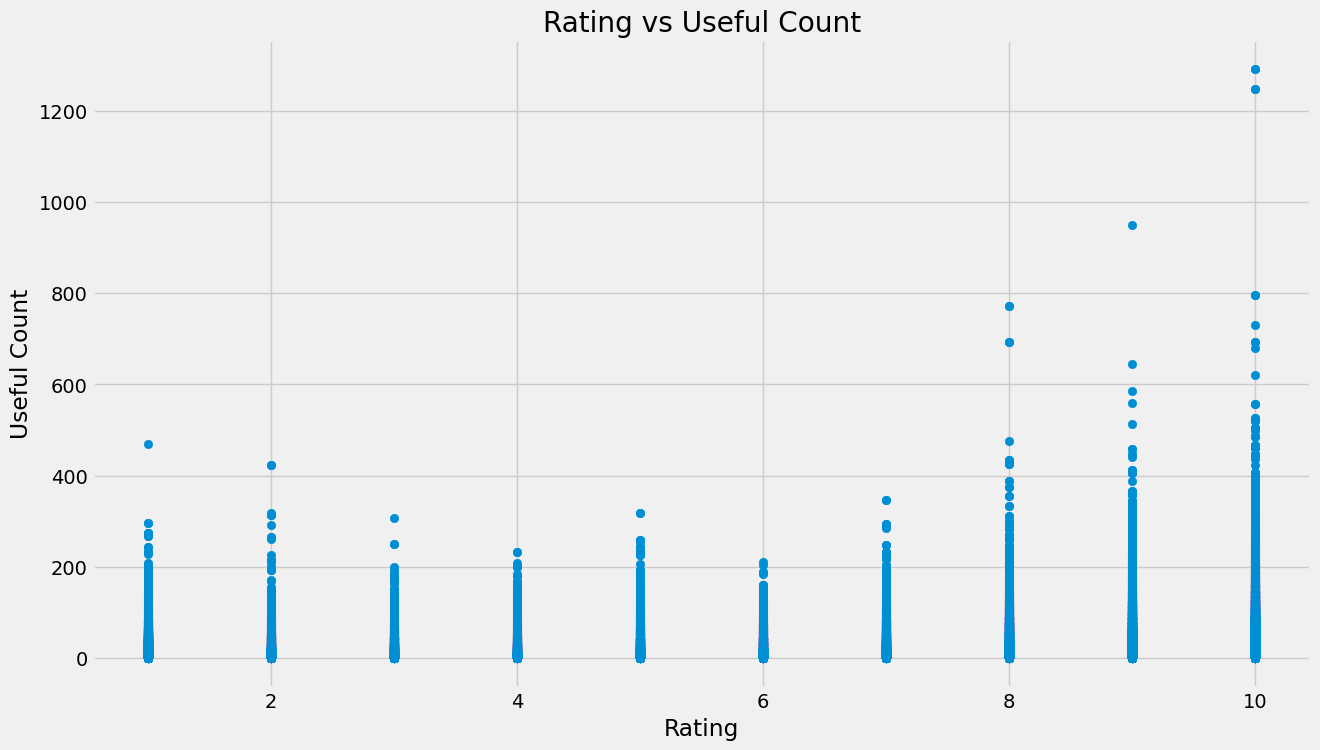

In [ ]:
plt.scatter(train.rating, train.usefulCount)
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.title('Rating vs Useful Count')

In [ ]:
train.rating.value_counts()

10    50504
9     27219
1     21391
8     18688
7      9338
5      7907
2      6833
3      6422
6      6254
4      4942
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

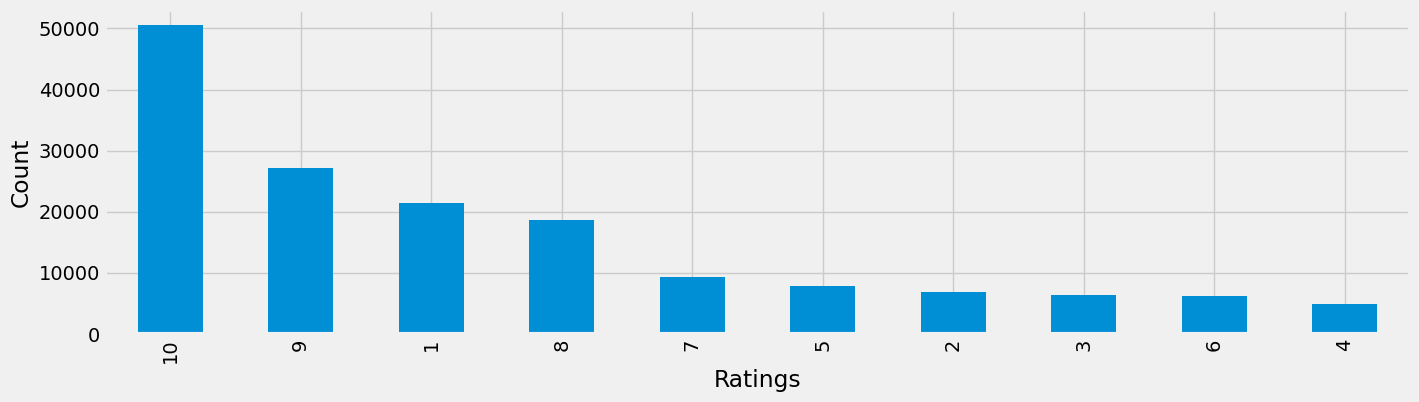

In [ ]:
train.rating.value_counts().plot(kind = "bar")
plt.xlabel("Ratings")
plt.ylabel("Count")

In [ ]:
train['len']  = train['review'].apply(len)

In [ ]:
train[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.759619   3692
2        9  452.674960  10787
3        8  461.360012   5112
4        7  464.276811   3030
5        6  478.006071   2048
6        4  467.732811   2202
7        6  485.678946   3063
8        3  483.919467   4087
9        3  477.910577   6182
10       3  443.477863   6192

In [ ]:
train['review'][train['len'] == train['len'].max()].iloc[0]


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

In [ ]:
train['len'].max()

10787

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# First lets remove Punctuations from the Reviews

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [ ]:
train['review'] = train['review'].apply(punctuation_removal)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Now lets Remove the Stopwords also

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [ ]:
train['review'] = train['review'].apply(stopwords_removal)

In [ ]:
# lets remove the Numbers also

import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [ ]:
train['review'] = train['review'].apply(drop_numbers)

In [ ]:
# for using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK
#(Valence Aware Dictionary and Sentiment Reasoner)

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# lets calculate the Sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in train['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
train['sentiment'] = pd.Series(data=train_sentiments)

In [ ]:
train[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9982  0.006169  0.9911
2        -0.9894 -0.003758  0.9923
3        -0.9920  0.007096  0.9901
4        -0.9912  0.010278  0.9909
5        -0.9931 -0.000815  0.9924
6        -0.9925  0.007830  0.9868
7        -0.9914  0.001193  0.9923
8        -0.9936  0.003657  0.9893
9        -0.9944  0.008380  0.9936
10       -0.9947  0.008548  0.9911

In [ ]:
#drop the sentiment column and remove the unique Id, date, review, len, and sentiment column also
train = train.drop(['date','uniqueID','sentiment','review','len'], axis = 1)

# lets check the name of columns now
train.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

In [ ]:
min_rating = train['rating'].min()
max_rating = train['rating'].max()
min_rating


1

In [ ]:
max_rating

10

In [ ]:
rating = 1
rating -= min_rating
#rating = rating/(max_rating -1)
#rating *= 5
#rating = int(round(rating,0))

In [ ]:
def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1

In [ ]:
train['eff_score'] = train['rating'].apply(scale_rating)

In [ ]:
train.sample(3)

,drugName,condition,rating,usefulCount,eff_score,usefulness
36776,Skyla,Birth Control,3,3,0,0
21731,Hypercare,Hyperhidrosis,10,29,1,290
8430,Adapalene / benzoyl peroxide,Acne,9,16,1,144


In [ ]:
# lets also calculate Usefulness Score

train['usefulness'] = train['rating']*train['usefulCount']*train['eff_score']

# lets check the Top 10 Most Useful Drugs with their Respective Conditions
train[['drugName','condition','usefulness']][train['usefulness'] > train['usefulness'].mean()].sort_values(by = 'usefulness', ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Zoloft,Depression,12910
1,Sertraline,Depression,12910
2,Mirena,Birth Control,12470
3,Levonorgestrel,Birth Control,12470
4,Zoloft,Depression,8541
5,Adipex-P,Weight Loss,7960
6,Phentermine,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Vilazodone,Depression,6930
9,Viibryd,Depression,6930


In [ ]:
# lets calculate the Number of Useless and Useful Drugs for Each Condition

@interact
def check(condition = list(train['condition'].value_counts().index)):
    return train[train['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [ ]:
# lets check the Most Common Conditions

train['condition'].nunique()

811

In [ ]:
train['condition'].value_counts().sample(20)

Binge Eating Disorde                                               64
Short Stature for Age                                               1
Performance Anxiety                                                 7
Tuberculosis, Latent                                               10
Bleeding Disorde                                                    7
t Care                                                              2
Prostatitis                                                        90
Scabies                                                            11
Hypoactive Sexual Desire Disorde                                    7
Toothache                                                           2
Hypothyroidism, After Thyroid Removal                             147
Sjogren's Syndrome                                                 49
Extrapyramidal Reaction                                            24
Dry Eye Disease                                                   130
Adult Human Growth H

In [ ]:
# lets check Drugs, which were useful to Highest Number of Poeple
train[['condition','drugName','usefulCount']][train['usefulCount'] > train['usefulCount'].mean()].sort_values(by = 'usefulCount', ascending = False).head(10).reset_index(drop = True)

,condition,drugName,usefulCount
0,Depression,Zoloft,1291
1,Depression,Sertraline,1291
2,Birth Control,Levonorgestrel,1247
3,Birth Control,Mirena,1247
4,Depression,Zoloft,949
5,Weight Loss,Phentermine,796
6,Weight Loss,Adipex-P,796
7,Depression,Celexa,771
8,Depression,Citalopram,771
9,Birth Control,Implanon,730


In [ ]:
train = train.drop_duplicates()

In [ ]:
@interact
def high_low_rate(condition = sorted((list(train['condition'].value_counts().index)))):
    print("\n Top 5 Drugs\n Consult Physician before taking any drugs")
    print(train[train['condition'] == condition][['drugName','usefulness','rating']].sort_values(by = 'usefulness',
                        ascending = False).head().reset_index(drop = True))
    

interactive(children=(Dropdown(description='condition', options=('ADHD', 'AIDS Related Wasting', 'AV Heart Blo…